In [1]:
# re-do the original Kaggle kernel  
# https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 1000

In [3]:
# help function 

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)  
    
    
# model 



def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(4,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## 0) Get data

In [4]:
iris = datasets.load_iris()
x = iris.data
y = to_categorical(iris.target)
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

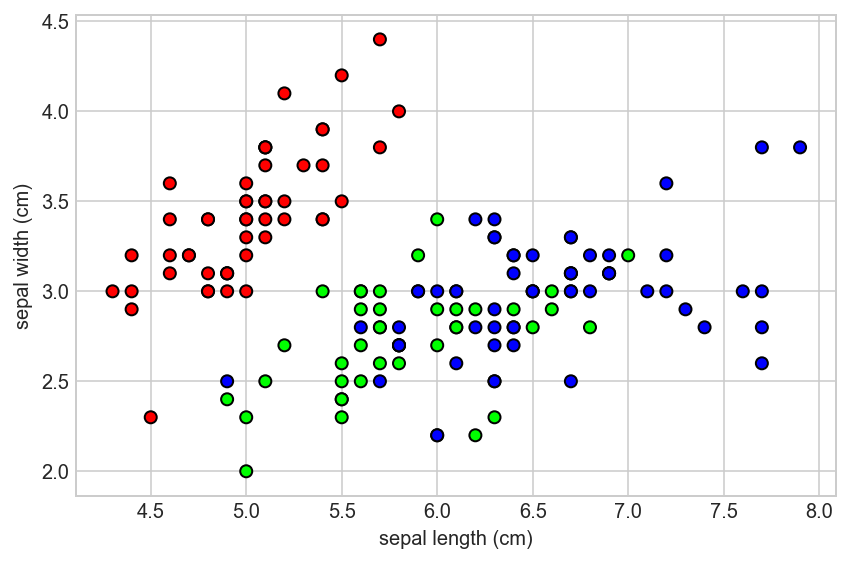

In [5]:
with plt.style.context('seaborn-whitegrid'):
    plt.scatter(x[:,xid],x[:,yid],c=y,cmap=plt.cm.Set1,edgecolor='k')
    plt.xlabel(iris.feature_names[xid])
    plt.ylabel(iris.feature_names[yid])
    plt.tight_layout()
    plt.show()

## 0') Split train/test set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 1) Train with Keras 

In [18]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))

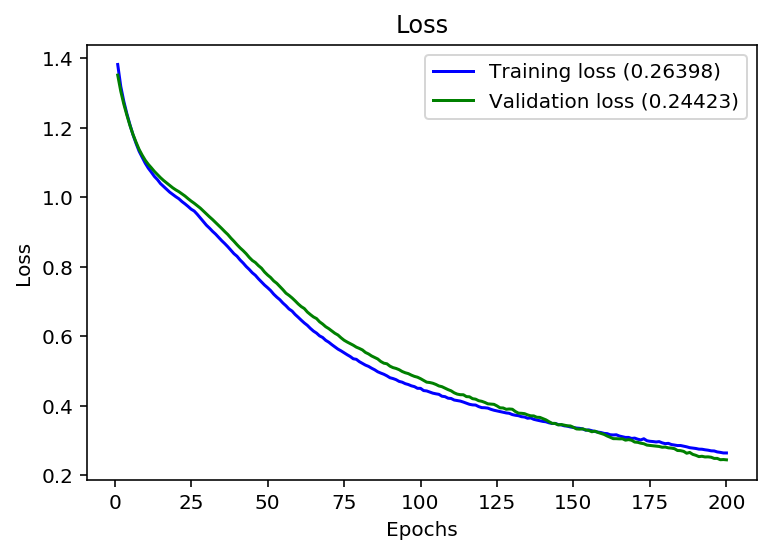

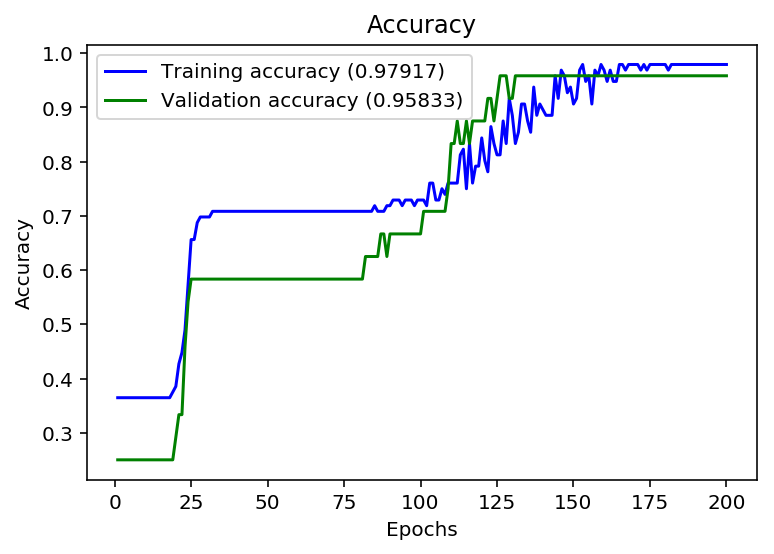

In [19]:
# visualize train history 

plot_history(history)

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9583333333333334

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         8
          1    1.00000   0.90000   0.94737        10
          2    0.85714   1.00000   0.92308         6

avg / total    0.96429   0.95833   0.95884        24

[[8 0 0]
 [0 9 1]
 [0 0 6]]


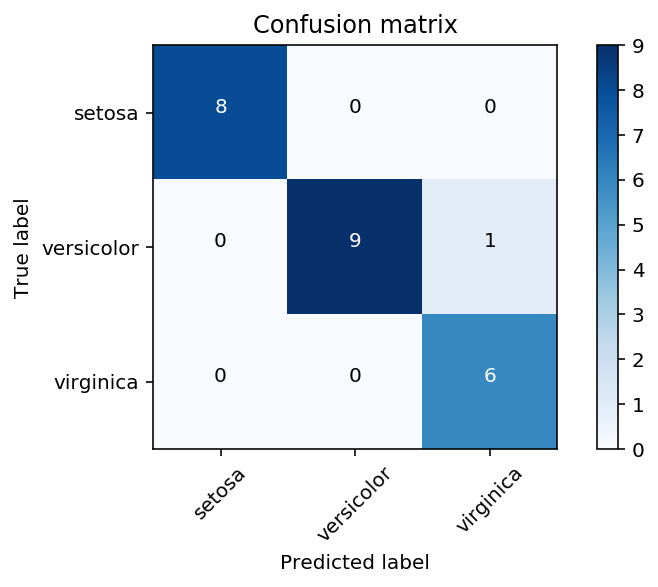

In [9]:
# performance report with TRAIN data 

full_multiclass_report(model,
                       x_val,
                       y_val,
                       le.inverse_transform(np.arange(3)))

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9666666666666667

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         9
          1    1.00000   0.91667   0.95652        12
          2    0.90000   1.00000   0.94737         9

avg / total    0.97000   0.96667   0.96682        30

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


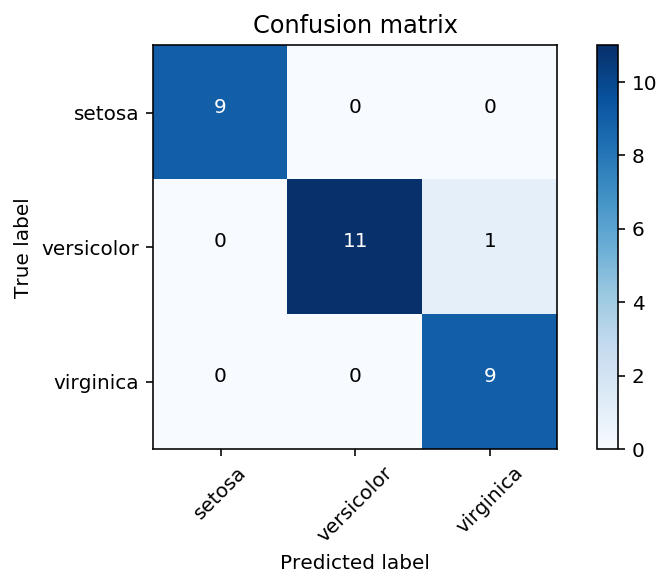

In [10]:
# performance report with TEST data 

full_multiclass_report(model,
                       x_test,
                       y_test,
                       le.inverse_transform(np.arange(3)))

## 2) Grid Search

In [11]:
"""
### here we have to NOT to ENCODE (one-hot-encode) the ouput (y) when train the model via GridSearchCV
    so here we have to reload the iris dataset for transform y from 
    
    
       array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],...]]))
       
       to
       
       array([1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1....])
                  

"""


### reload the iris dataset 

y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
# train the model via GridSearchCV
model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [[4],[8],[8,8]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[5,16]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(x_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Parameters of the best model: 
{'dense_layers': [8, 8], 'activation': 'tanh', 'optimizer': 'rmsprop', 'batch_size': 5, 'epochs': 50}


In [14]:
# show the best parameters 

print ('Parameters of the best model:')
print ({'activation': 'tanh', 'batch_size': 5, 'dense_layers': [8, 8], 'epochs': 50, 'optimizer': 'rmsprop'})

Parameters of the best model:
{'dense_layers': [8, 8], 'activation': 'tanh', 'optimizer': 'rmsprop', 'batch_size': 5, 'epochs': 50}


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_342 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_343 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_344 (Dense)            (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


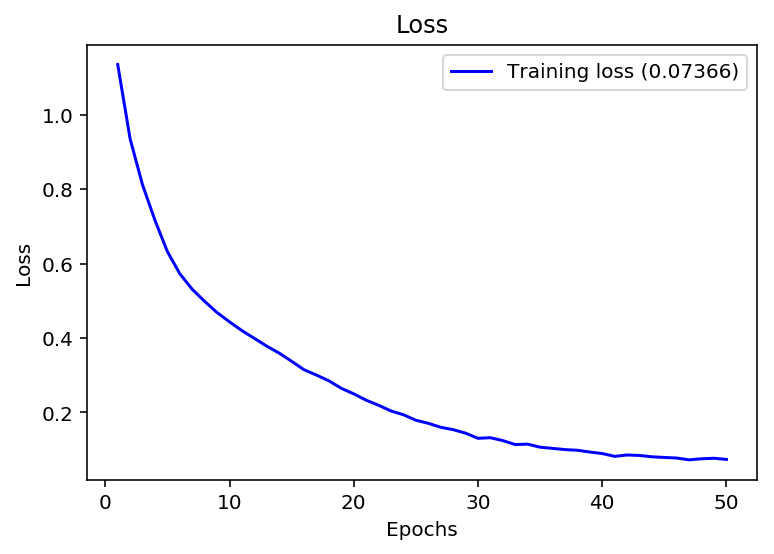

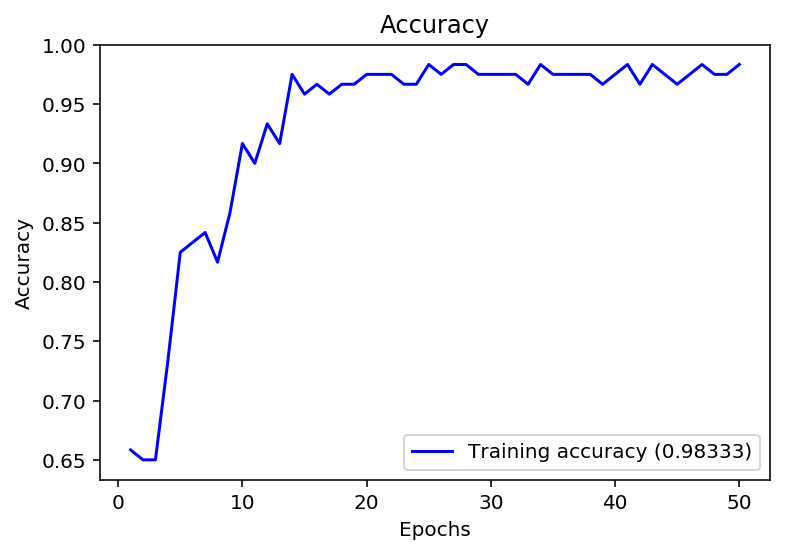

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9333333333333333

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000         9
          1    1.00000   0.83333   0.90909        12
          2    0.81818   1.00000   0.90000         9

avg / total    0.94545   0.93333   0.93364        30

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


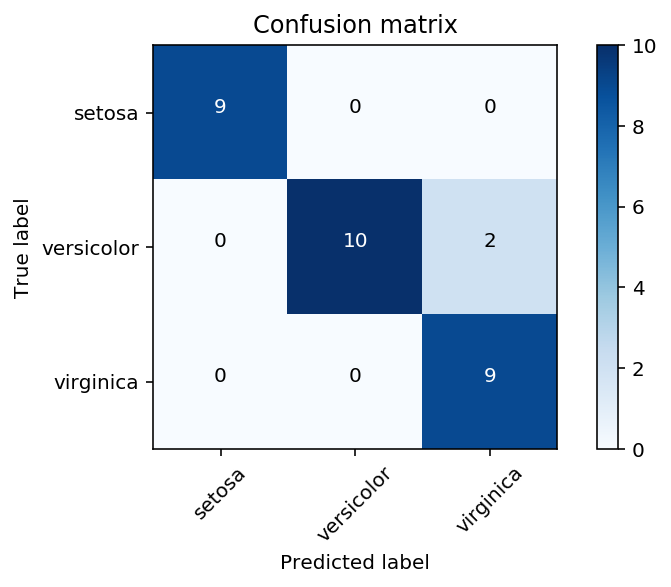

In [15]:
# re-run all the modeling process with best parameters  


## First redefine y as categorical variable
y = to_categorical(iris.target,3)

## Rebuild the training and test set with the categorical y
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

## Capture the best params
params = grid_results.best_params_

## create the model with the best params found
model = create_model(dense_layers=params['dense_layers'],
                     activation=params['activation'],
                     optimizer=params['optimizer'])

## Then train it and display the results
history = model.fit(x_train,
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose = 0)

model.summary()
plot_history(history)
full_multiclass_report(model,
                       x_test,
                       y_test,
                       classes=le.inverse_transform(np.arange(3)))

